In [2]:
# Load dependencies
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
from cosmos_helper_funcs import *
from defect_pixel_funcs import *
from scipy.optimize import curve_fit

In [2]:
# Load dark current data
bias_folder_CMS = '/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Dark Current/CMS'
bias_folder_HSHGRS = '/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Dark Current/HS_HG_RS'
bias_folder_HSHGGS = '/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Dark Current/HS_HG_GS'
bias_stack_CMS = get_stacks(bias_folder_CMS, get_mean_img=True, num_imgs=0)[0]
bias_stack_HSHGRS = get_stacks(bias_folder_HSHGRS, get_mean_img=True, num_imgs=0)[0]
bias_stack_HSHGGS = get_stacks(bias_folder_HSHGGS, get_mean_img=True, num_imgs=0)[0]
dark_current_folder_CMS = '/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Dark Current/CMS/Dark Current vs Temperature/Calibrated'
dark_current_folder_HSHGRS = '/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Dark Current/HS_HG_RS/Dark Current vs Temperature/Calibrated'
dark_current_folder_HSHGGS = '/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Dark Current/HS_HG_GS/Dark Current vs Temperature/Calibrated'
stacks_CMS = get_stacks(dark_current_folder_CMS, get_mean_img=True, num_imgs=0)
stacks_HSHGRS = get_stacks(dark_current_folder_HSHGRS, get_mean_img=True, num_imgs=0)
stacks_HSHGGS = get_stacks(dark_current_folder_HSHGGS, get_mean_img=True, num_imgs=0)
defect_map_calibration_CMS = fits.open('/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Final Data Products/Calibration/Defect Maps/defect_map_calibration_CMS.fits')[0].data
defect_map_dark_CMS = fits.open('/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Final Data Products/Calibration/Defect Maps/defect_map_dark_CMS.fits')[0].data
defect_map_calibration_HSHGRS = fits.open('/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Final Data Products/Calibration/Defect Maps/defect_map_calibration_HSHGRS.fits')[0].data
defect_map_dark_HSHGRS = fits.open('/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Final Data Products/Calibration/Defect Maps/defect_map_dark_HSHGRS.fits')[0].data
defect_map_calibration_HSHGGS = fits.open('/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Final Data Products/Calibration/Defect Maps/defect_map_calibration_HSHGGS.fits')[0].data
defect_map_dark_HSHGGS = fits.open('/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Final Data Products/Calibration/Defect Maps/defect_map_dark_HSHGGS.fits')[0].data


Now reading /Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Dark Current/CMS/calibrated_CMS_RS_dark_1us_-25C 2024-10-18 19_24_57.fits
Now reading /Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Dark Current/HS_HG_RS/calibrated_HSHG_RS_dark_1us_-25C 2024-09-28 22_03_08.fits
Now reading /Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Dark Current/HS_HG_GS/calibrated_HSHG_GS_dark_1us_-25C 2024-09-28 22_59_56.fits
Now reading /Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Dark Current/CMS/Dark Current vs Temperature/Calibrated/calibrated_CMS_RS_dark_600000ms_-35C 2024-10-19 20_16_30.fits
Now reading /Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might

In [3]:
# Find number of NaNs in defect_map_calibration_HSHGRS
# print(defect_map_calibration_HSHGRS)
# print(np.sum(np.isnan(defect_map_calibration_HSHGRS)) / 8120 ** 2 * 100)
# Save defect_map_calibration_HSHGRS so that all 0s become NaNs
# print((8120 **2 - np.sum(defect_map_calibration_HSHGGS)) / 8120 ** 2 * 100)
# defect_map_calibration_HSHGGS_nan = np.zeros(defect_map_calibration_HSHGGS.shape)
# defect_map_calibration_HSHGRS[defect_map_calibration_HSHGRS == 0] = 1
# print(np.sum(np.isnan(defect_map_calibration_HSHGRS)) / 8120 ** 2 * 100)
# fits.writeto('/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Final Data Products/Calibration/Defect Maps/defect_map_calibration_HSHGRS.fits', defect_map_calibration_HSHGRS, overwrite=True)

In [19]:
gain_CMS = 4.27
exp_time = 600 # seconds
bias_level = 100
bias_frame_CMS = bias_stack_CMS['mean_img']
stacks_CMS = sorted(stacks_CMS, key=lambda x: float(x['cam_temp_Cel']))
temps_CMS = np.array([float(stack['cam_temp_Cel']) for stack in stacks_CMS])
dc_frames_CMS = np.zeros((len(stacks_CMS), 8120, 8120))
dc_mean_vals_CMS = np.zeros(len(stacks_CMS))
dc_median_vals_CMS = np.zeros(len(stacks_CMS))
for i, stack in enumerate(stacks_CMS):
    dc_frame = (stack['mean_img'] - bias_frame_CMS) / exp_time / gain_CMS
    # dc_frame = (stack['mean_img'] - bias_level) / exp_time / gain_CMS
    dc_frame = dc_frame * defect_map_calibration_CMS # * defect_map_dark_CMS
    dc_frames_CMS[i] = dc_frame
    dc_mean_vals_CMS[i] = np.nanmean(dc_frame)
    dc_median_vals_CMS[i] = np.nanmedian(dc_frame)
    print(temps_CMS[i], dc_mean_vals_CMS[i], dc_median_vals_CMS[i])

-35.0 0.0782192278252983 0.047653487624558025
-30.0 0.09984070873483945 0.06196522324776906
-25.0 0.13720445863853994 0.08719061395049825
-20.0 0.20281374963587645 0.1329919946120525
-15.0 0.3258857620395817 0.22205384886194915
5.0 3.595985558426343 2.982573357211737
15.0 12.991345082761196 11.917562106809939


In [5]:
gain_HSHGRS = 1.041
bias_frame_HSHGRS = bias_stack_HSHGRS['mean_img']
stacks_HSHGRS = sorted(stacks_HSHGRS, key=lambda x: float(x['cam_temp_Cel']))
temps_HSHGRS = np.array([float(stack['cam_temp_Cel']) for stack in stacks_HSHGRS])
dc_frames_HSHGRS = np.zeros((len(stacks_HSHGRS), 8120, 8120))
dc_mean_vals_HSHGRS = np.zeros(len(stacks_HSHGRS))
dc_median_vals_HSHGRS = np.zeros(len(stacks_HSHGRS))
for i, stack in enumerate(stacks_HSHGRS):
    dc_frame = (stack['mean_img'] - bias_frame_HSHGRS) / exp_time / gain_HSHGRS
    dc_frame = dc_frame * defect_map_calibration_HSHGRS * defect_map_dark_HSHGRS
    dc_frames_HSHGRS[i] = dc_frame
    dc_mean_vals_HSHGRS[i] = np.nanmean(dc_frame)
    dc_median_vals_HSHGRS[i] = np.nanmedian(dc_frame)
    print(temps_HSHGRS[i], dc_mean_vals_HSHGRS[i], dc_median_vals_HSHGRS[i])
    

-25.0 0.10974487448874912 0.08045933711300722
-20.0 0.177331662134587 0.13406227044131774
-10.0 0.5113984382519277 0.3928004118714409
0.0 1.7846914072901192 1.4504812491759433
10.0 6.4431501704123555 5.70509439766941
15.0 12.133345444567215 11.301099370263637


In [6]:
gain_HSHGGS = 1.052
bias_frame_HSHGGS = bias_stack_HSHGGS['mean_img']
stacks_HSHGGS = sorted(stacks_HSHGGS, key=lambda x: float(x['cam_temp_Cel']))
temps_HSHGGS = np.array([float(stack['cam_temp_Cel']) for stack in stacks_HSHGGS])
dc_frames_HSHGGS = np.zeros((len(stacks_HSHGGS), 8120, 8120))
dc_mean_vals_HSHGGS = np.zeros(len(stacks_HSHGGS))
dc_median_vals_HSHGGS = np.zeros(len(stacks_HSHGGS))
for i, stack in enumerate(stacks_HSHGGS):
    dc_frame = (stack['mean_img'] - bias_frame_HSHGGS) / exp_time / gain_HSHGGS
    # dc_frame = (stack['mean_img'] - bias_level) / exp_time / gain_HSHGGS
    dc_frame = dc_frame * defect_map_calibration_HSHGGS * defect_map_dark_HSHGGS
    dc_frames_HSHGGS[i] = dc_frame
    dc_mean_vals_HSHGGS[i] = np.nanmean(dc_frame)
    dc_median_vals_HSHGGS[i] = np.nanmedian(dc_frame)
    print(temps_HSHGGS[i], dc_mean_vals_HSHGGS[i], dc_median_vals_HSHGGS[i])

-25.0 0.11102487293841469 0.08239829518626209
-20.0 0.16704883633850287 0.12500310643902682
-10.0 0.48294617878975193 0.3737822759014886
0.0 1.69708256305766 1.3690698078978103
10.0 6.309337183101153 5.547401153110167
11.0 7.358449494048537 6.529455254852257


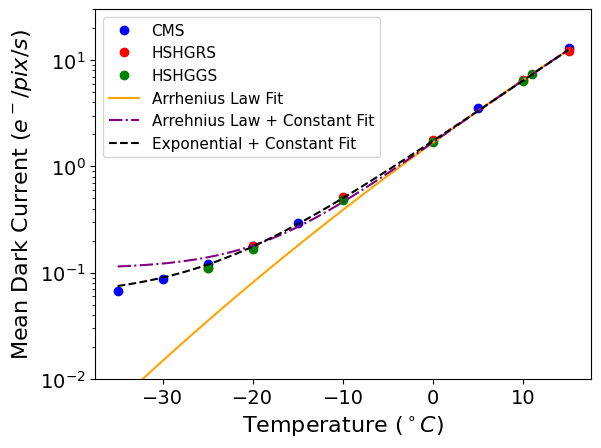

In [7]:
%matplotlib inline
# Fit function to dark current vs. temperature to find doubling temperature
def func_1(x, a, b, c):
    return a * np.exp(b * x) + c

def func_2(x, a, b):
    return a * (x + 273.15) ** 2 * np.exp(-b / (x + 273.15))

def func_3(x, a, b, c):
    return a * (x + 273.15) ** 2 * np.exp(-b / (x + 273.15)) + c

# Increase overall fontsize
plt.rcParams.update({'font.size': 14})

all_temps = np.concatenate((temps_CMS, temps_HSHGRS, temps_HSHGGS))
all_dc_mean_vals = np.concatenate((dc_mean_vals_CMS, dc_mean_vals_HSHGRS, dc_mean_vals_HSHGGS))
fit_temps = np.linspace(temps_CMS[0], temps_CMS[-1], 100)
popt_1, pcov_1 = curve_fit(func_1, all_temps, all_dc_mean_vals, maxfev=10000)
fit_vals_1 = func_1(fit_temps, *popt_1)
popt_2, pcov_2 = curve_fit(func_2, all_temps, all_dc_mean_vals, maxfev=10000)
fit_vals_2 = func_2(fit_temps, *popt_2)
popt_3, pcov_3 = curve_fit(func_3, all_temps, all_dc_mean_vals, maxfev=10000)
fit_vals_3 = func_3(fit_temps, *popt_3)

plt.plot(temps_CMS, dc_mean_vals_CMS, 'bo', label='CMS')
plt.plot(temps_HSHGRS, dc_mean_vals_HSHGRS, 'ro', label='HSHGRS')
plt.plot(temps_HSHGGS, dc_mean_vals_HSHGGS, 'go', label='HSHGGS')
plt.plot(fit_temps, fit_vals_2, '-', label='Arrhenius Law Fit', color='orange')
plt.plot(fit_temps, fit_vals_3, '-.', label='Arrehnius Law + Constant Fit', color='purple')
plt.plot(fit_temps, fit_vals_1, '--', label='Exponential + Constant Fit', color='black')

# Put doubling temperature and asymptote on plot halfway up and to the left using axis transform
# plt.text(0.01, 0.7, 'Doubling temperature: {:.2f} C\nAsymptotic dark current: {:.3f} e-/pix/s'.format(np.log(2) / popt_1[1], popt_1[2]),
#          transform=plt.gca().transAxes)
plt.ylim(1e-2, 3e1)
plt.yscale('log')
plt.xlabel(r'Temperature ($^\circ C$)', fontsize=16)
plt.ylabel(r'Mean Dark Current $(e^-/pix/s)$', fontsize=16)
plt.legend(fontsize=11)
plt.show()

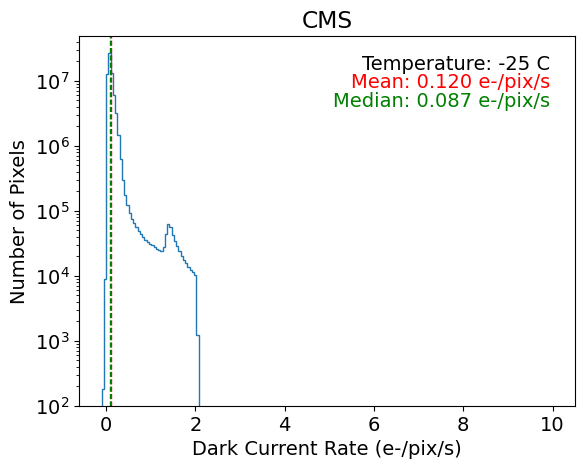

In [8]:
percentile_1 = np.percentile(dc_frames_CMS[2], 1)
percentile_95 = np.percentile(dc_frames_CMS[2], 95)
plt.hist(dc_frames_CMS[2].flatten(), bins=200, range=(-0.1, 10), histtype='step')
# Put vertical lines labeling the mean, median, and rms values
plt.axvline(dc_mean_vals_CMS[2], color='r', linestyle='dashed', linewidth=1)
plt.axvline(dc_median_vals_CMS[2], color='g', linestyle='dashed', linewidth=1)
# Write the temperature, mean value, median value, and rms value on the plot. Color the text
# to match the lines
plt.text(0.95, 0.95, f'Temperature: {stacks_CMS[2]["cam_temp_Cel"]} C', ha='right', va='top', transform=plt.gca().transAxes)
plt.text(0.95, 0.9, f'Mean: {dc_mean_vals_CMS[2]:.3f} e-/pix/s', ha='right', va='top', color='r', transform=plt.gca().transAxes)
plt.text(0.95, 0.85, f'Median: {dc_median_vals_CMS[2]:.3f} e-/pix/s', ha='right', va='top', color='g', transform=plt.gca().transAxes)
plt.xlabel('Dark Current Rate (e-/pix/s)')
plt.ylabel('Number of Pixels')
plt.yscale('log')
plt.title('CMS')
plt.show()

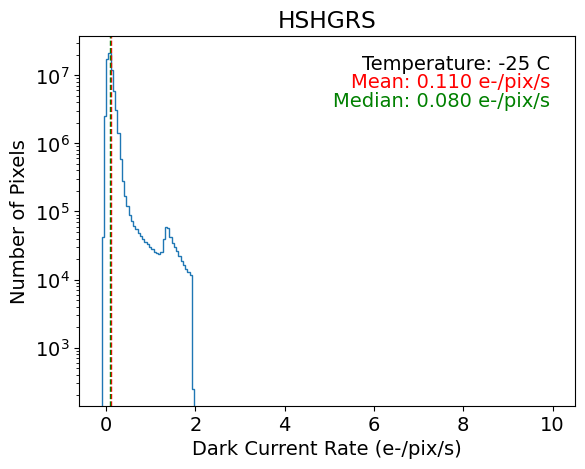

In [9]:
percentile_1 = np.percentile(dc_frames_HSHGRS[0], 1)
percentile_95 = np.percentile(dc_frames_HSHGRS[0], 95)
plt.hist(dc_frames_HSHGRS[0].flatten(), bins=200, range=(-0.1, 10), histtype='step')
# Put vertical lines labeling the mean, median, and rms values
plt.axvline(dc_mean_vals_HSHGRS[0], color='r', linestyle='dashed', linewidth=1)
plt.axvline(dc_median_vals_HSHGRS[0], color='g', linestyle='dashed', linewidth=1)
# Write the temperature, mean value, median value, and rms value on the plot. Color the text
# to match the lines
plt.text(0.95, 0.95, f'Temperature: {stacks_HSHGRS[0]["cam_temp_Cel"]} C', ha='right', va='top', transform=plt.gca().transAxes)
plt.text(0.95, 0.9, f'Mean: {dc_mean_vals_HSHGRS[0]:.3f} e-/pix/s', ha='right', va='top', color='r', transform=plt.gca().transAxes)
plt.text(0.95, 0.85, f'Median: {dc_median_vals_HSHGRS[0]:.3f} e-/pix/s', ha='right', va='top', color='g', transform=plt.gca().transAxes)
plt.xlabel('Dark Current Rate (e-/pix/s)')
plt.ylabel('Number of Pixels')
plt.yscale('log')
plt.title('HSHGRS')
plt.show()

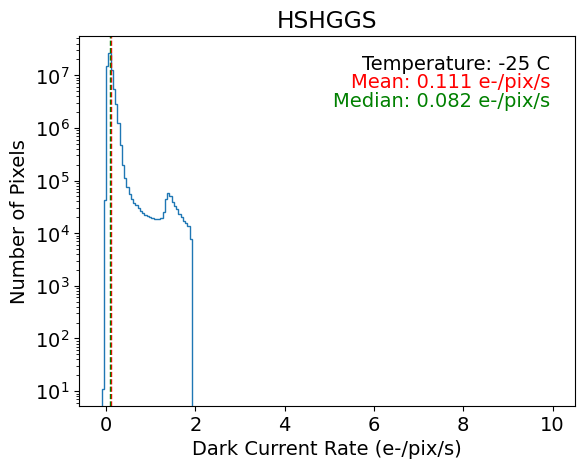

In [10]:
percentile_1 = np.percentile(dc_frames_HSHGGS[0], 1)
percentile_95 = np.percentile(dc_frames_HSHGGS[0], 95)
plt.hist(dc_frames_HSHGGS[0].flatten(), bins=200, range=(-0.1, 10), histtype='step')
# Put vertical lines labeling the mean, median, and rms values
plt.axvline(dc_mean_vals_HSHGGS[0], color='r', linestyle='dashed', linewidth=1)
plt.axvline(dc_median_vals_HSHGGS[0], color='g', linestyle='dashed', linewidth=1)
# Write the temperature, mean value, median value, and rms value on the plot. Color the text
# to match the lines
plt.text(0.95, 0.95, f'Temperature: {stacks_HSHGGS[0]["cam_temp_Cel"]} C', ha='right', va='top', transform=plt.gca().transAxes)
plt.text(0.95, 0.9, f'Mean: {dc_mean_vals_HSHGGS[0]:.3f} e-/pix/s', ha='right', va='top', color='r', transform=plt.gca().transAxes)
plt.text(0.95, 0.85, f'Median: {dc_median_vals_HSHGGS[0]:.3f} e-/pix/s', ha='right', va='top', color='g', transform=plt.gca().transAxes)
plt.xlabel('Dark Current Rate (e-/pix/s)')
plt.ylabel('Number of Pixels')
plt.yscale('log')
plt.title('HSHGGS')
plt.show()

In [31]:
def plot_dark_defect_hist(med_img, clip_type='sigma', cutoff_level=5, cut_high=True, cut_low=True, num_bins=512, filedata=None, iterate=True, show_gaussian=True):
    '''Plot the histogram of pixel values to identify defect pixels.'''
    if clip_type == 'sigma':
        defect_map, med_img_median, iterated_std, iter = sigma_clip_map(med_img, cutoff_level, iterate, cut_high, cut_low)
    elif clip_type == 'mad':
        defect_map, med_img_median, iterated_std, iter = mad_clip_map(med_img, cutoff_level, iterate, cut_high, cut_low)
    elif clip_type=='absolute':
        defect_map, med_img_median, iterated_std, iter = absolute_clip_map(med_img, cutoff_level, cut_high, cut_low, use_median=False)
    diff_img = med_img
    num_pix = med_img.size
    max_val = np.max(diff_img)
    min_val = np.min(diff_img)
    (hist, bins, patches) = plt.hist(diff_img.flatten(), bins=num_bins, histtype='step', color='black')
    defect_pix_count = np.count_nonzero(np.isnan(defect_map))
    defect_frac = defect_pix_count / num_pix
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    if show_gaussian:
        y = 1 / np.sqrt(2 * np.pi * iterated_std ** 2) * np.exp(-(bin_centers - med_img_median) ** 2 / (2 * iterated_std ** 2))
        y *= num_pix * (max_val - min_val) / num_bins
        plt.plot(bin_centers, y, color='red')
    # Put vertical black lines at the defect pixel cutoffs
    low_cutoff = med_img_median - cutoff_level * iterated_std
    high_cutoff = med_img_median + cutoff_level * iterated_std
    if clip_type == 'absolute':
        low_cutoff = med_img_median - cutoff_level
        high_cutoff = med_img_median + cutoff_level
        label_str = str(cutoff_level)
    elif clip_type == 'mad':
        label_str = str(cutoff_level) + r'$\sigma_{mad}$'
    else:
        label_str = str(cutoff_level) + r'$\sigma$'
    # if cut_high:
    #     plt.axvline(x=high_cutoff, color='red', linestyle='--', label='Cutoff:' + format(high_cutoff, '3.0f') + r' $e^-/s$')
    if cut_low:
        plt.axvline(x=low_cutoff, color='black')    
        plt.text(low_cutoff, 1.0, '-' + label_str, color='black', horizontalalignment='right')
    median_dc_no_defects = np.nanmedian(med_img[~np.isnan(defect_map)])
    plt.axvline(x=median_dc_no_defects, color='green', linestyle='--', label='Median: ' + format(median_dc_no_defects, '4.3f') + r' $e^-/s$')
    mean_dc_no_defects = np.nanmean(med_img[~np.isnan(defect_map)])
    plt.axvline(x=mean_dc_no_defects, color='blue', linestyle='-', label='Mean: ' + format(mean_dc_no_defects, '4.3f') + r' $e^-/s$')
    plt.axvline(x=high_cutoff, color='red', linestyle='-.', label='Cutoff:' + format(high_cutoff, '3.0f') + r' $e^-/s$')
    plt.ylim(1, 5*10**7)
    plt.xlim(-1, 20)
    plt.xscale('symlog')
    plt.yscale('log')
    plt.xlabel(r'Dark Current ($e^-/s$)', fontsize=16)
    plt.ylabel('Number of Pixels', fontsize=16)
    plt.legend(fontsize=12)
    # plt.title('Defect Pixel Histogram')
    # if filedata is not None:
    #     label_plot(filedata)
    plt.show()
    return defect_map, med_img_median, iterated_std, iter

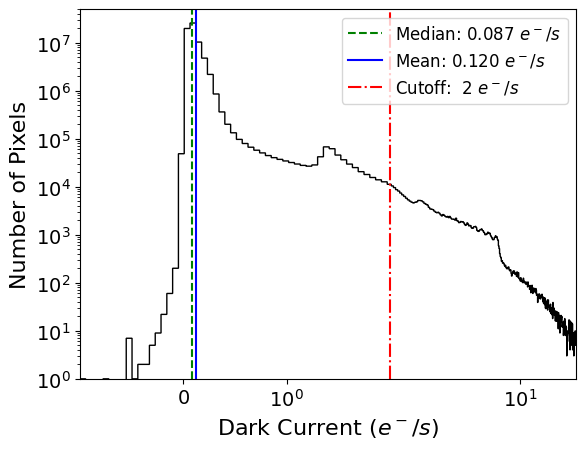

In [32]:
%matplotlib inline
# defect_map_neg35_CMS = plot_dark_defect_hist(dc_frames_CMS[0], clip_type='absolute', cutoff_level=2, cut_low=False, cut_high=True, filedata=stacks_CMS[0], show_gaussian=False)[0]
defect_map_neg25_CMS = plot_dark_defect_hist(dc_frames_CMS[2], clip_type='absolute', cutoff_level=2, cut_low=False, cut_high=True, filedata=stacks_CMS[2], show_gaussian=False)[0]

In [13]:
# # Save the neg25 defect map to defect_map_dark_CMS.fits
# # Make header with a few keys
# header = fits.Header()
# header['COMMENT'] = 'Defect map for hot pixels in CMS mode'
# header['CUTOFF'] = '2 e-/pix/s'
# header['TEMP'] = '-25 C'
# header['EXP_TIME'] = '600 s'
# hdu = fits.PrimaryHDU(defect_map_neg25_CMS, header=header)
# hdu.writeto('defect_map_dark_CMS.fits', overwrite=True)

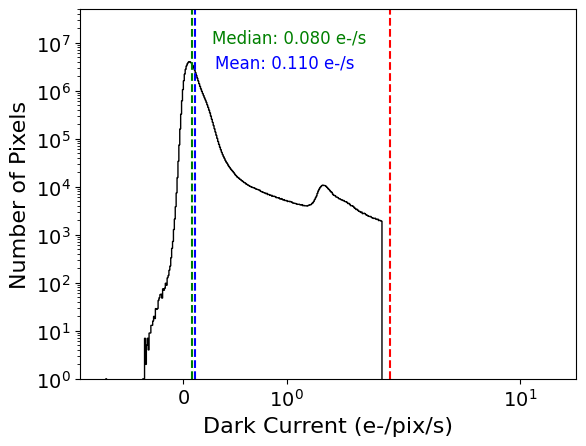

In [14]:
defect_map_neg25_HSHGRS = plot_dark_defect_hist(dc_frames_HSHGRS[0], clip_type='absolute', cutoff_level=2, cut_low=False, cut_high=True, filedata=stacks_HSHGRS[0], show_gaussian=False)[0]

In [15]:
# # Save the neg25 defect map to defect_map_dark_HSHGRS.fits
# # Make header with a few keys
# header = fits.Header()
# header['COMMENT'] = 'Defect map for hot pixels in CMS mode'
# header['CUTOFF'] = '2 e-/pix/s'
# header['TEMP'] = '-25 C'
# header['EXP_TIME'] = '600 s'
# hdu = fits.PrimaryHDU(defect_map_neg25_HSHGRS, header=header)
# hdu.writeto('defect_map_dark_HSHGRS.fits', overwrite=True)

In [16]:
defect_map_neg25_HSHGGS = plot_dark_defect_hist(dc_frames_HSHGGS[0], clip_type='absolute', cutoff_level=2, cut_low=False, cut_high=True, filedata=stacks_HSHGGS[0], show_gaussian=False)[0]

KeyboardInterrupt: 

In [19]:
# # Save the neg25 defect map to defect_map_dark_HSHGRS.fits
# # Make header with a few keys
# header = fits.Header()
# header['COMMENT'] = 'Defect map for hot pixels in HSHGGS mode'
# header['CUTOFF'] = '2 e-/pix/s'
# header['TEMP'] = '-25 C'
# header['EXP_TIME'] = '600 s'
# hdu = fits.PrimaryHDU(defect_map_neg25_HSHGGS, header=header)
# hdu.writeto('defect_map_dark_HSHGGS.fits', overwrite=True)

In [20]:
full_dark_defect_map = defect_map_dark_CMS * defect_map_dark_HSHGRS
# Find total fraction of defect pixels (make sure hot pixels seem to agree between modes)
num_defect_pixels = np.nansum(full_dark_defect_map)
print(1 - num_defect_pixels / full_dark_defect_map.size)

0.0044391091751802


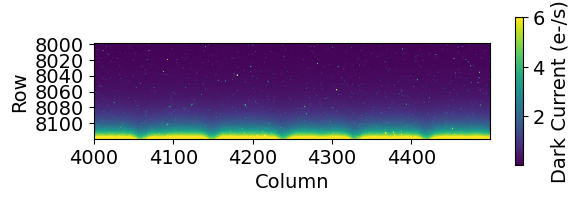

In [21]:
%matplotlib inline
plt.imshow(dc_frames_CMS[2][8000:,4000:4500], vmax=6)
# Add a colorbar to the plot with same height as the image. label should be 'Dark Current Rate (e-/pix/s)'
plt.colorbar(label='Dark Current (e-/s)', shrink=0.4)

# Adust ticks to show pixel values starting at 4000 for x and 8050 for y
plt.xticks(np.arange(0, 500, 100), np.arange(4000, 4500, 100))
plt.yticks(np.arange(0, 120, 20), np.arange(8000, 8120, 20))
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

In [22]:
# Check that calibration yields linear dark current vs. time
dark_linearity_folder = '/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Dark Current/CMS/Dark Linearity'
dark_linearity_stacks = get_stacks(dark_linearity_folder, get_mean_img=True, num_imgs=0)

Now reading /Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Dark Current/CMS/Dark Linearity/calibrated_CMS_RS_dark_5000ms_15C 2024-10-19 02_50_54.fits
Now reading /Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Dark Current/CMS/Dark Linearity/calibrated_CMS_RS_dark_60000ms_15C 2024-10-19 03_09_25.fits
Now reading /Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Dark Current/CMS/Dark Linearity/calibrated_CMS_RS_dark_30000ms_15C 2024-10-19 02_58_51.fits
Now reading /Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Dark Current/CMS/Dark Linearity/calibrated_CMS_RS_dark_10000ms_15C 2024-10-19 02_55_16.fits


KeyboardInterrupt: 

In [ ]:
# Sort stacks by exposure time
dark_linearity_stacks = sorted(dark_linearity_stacks, key=lambda x: float(x['exposure_ms']))
exp_times = np.array([float(stack['exposure_ms']) for stack in dark_linearity_stacks])
means = np.zeros(len(dark_linearity_stacks)-1)
for i, stack in enumerate(dark_linearity_stacks[1:]):
    dc_frame = (stack['mean_img'] - dark_linearity_stacks[0]['mean_img']) / gain / exp_times[i+1]
    dc_frame = dc_frame * defect_map_calibration
    means[i] = np.nanmean(dc_frame)

In [ ]:
plt.plot(exp_times[1:] / 1000, means, 'o')
plt.xlabel('Exposure Time (s)')
plt.ylabel('Mean Dark Current (e-/pix/s)')
plt.ylim(0,0.03)
plt.show()

In [11]:
# Finding number of PTC defect pixels
ptc_defect_map_file = '/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Final Data Products/Outlier Maps/HSHG_GS_combined_Outlier_binary_maskdark.fits'
ptc_defect_map = fits.open(ptc_defect_map_file)[0].data
# Convert zeros to NaN
ptc_defect_map[ptc_defect_map == 0] = np.nan
cal_defect_map_file = '/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Final Data Products/Calibration/Defect Maps/defect_map_calibration_HSHGGS.fits'
cal_defect_map = fits.open(cal_defect_map_file)[0].data
dark_defect_map_file = '/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Final Data Products/Calibration/Defect Maps/defect_map_dark_HSHGGS.fits'
dark_defect_map = fits.open(dark_defect_map_file)[0].data
print(np.sum(np.isnan(ptc_defect_map)))
tot_defect_map = ptc_defect_map * cal_defect_map * dark_defect_map
print(np.sum(np.isnan(tot_defect_map)))
not_ptc_defect_map = cal_defect_map * dark_defect_map
print(np.sum(np.isnan(not_ptc_defect_map)))

1019311
1019311
1011830
